#                                            Projet Big Data

## Partie A :  Implémentation de k-means séquentiel (Python)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
from itertools import repeat
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from typing import Tuple
from typing import List
import random
from random import randint
import math

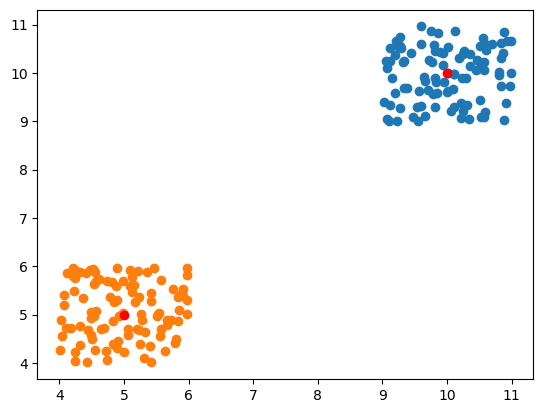

In [2]:
class_1_x=np.random.uniform(-1,1,100)+10
class_1_y=np.random.uniform(-1,1,100)+10
class_2_x=np.random.uniform(-1,1,100)+5
class_2_y=np.random.uniform(-1,1,100)+5

plt.scatter(class_1_x,class_1_y)
plt.scatter(class_2_x,class_2_y)
plt.plot([5],[5], marker='o',color='red')
plt.plot([10],[10], marker='o',color='red')
plt.show()

In [590]:
#Création d'un dataframe à partir du tableau des points générés plus haut, puis conversion en fichier csv

array=np.empty((200,3))
for k in range(100):
    array[k]=np.array([(class_1_x[k],class_1_y[k],0)])
for k in range(100,200):
    array[k]=np.array([(class_2_x[k%100],class_2_y[k%100],1)])

df=pd.DataFrame(data=array,columns=['x','y','class'])

with open('df.csv','w') as csv_file:
    df.to_csv(csv_file,index=False)

In [591]:
array=np.empty((200,2))
for k in range(100):
    array[k]=np.array([(class_1_x[k],class_1_y[k])])
for k in range(100,200):
    array[k]=np.array([(class_2_x[k%100],class_2_y[k%100])])

df=pd.DataFrame(data=array,columns=['x','y'])

with open('dataframe.csv','w') as csv_file:
    df.to_csv(csv_file,index=False)

Pour lire des données en consommant peu de mémoire, On va utiliser le bibliothèqu  Pandas avec la fonction "read_csv()" qui peut lire un fichier CSV en plusieurs chunks et les traiter en parallèle pour économiser de la mémoire, ainsi qu'on va determiner aussi le type de chaque colonne.

In [592]:
file_path='df.csv'
chunksize = 10**3
data = pd.read_csv(file_path, chunksize=chunksize,dtype={'x':np.float16,'y':np.float16,'class':np.uint8})
data = pd.read_csv(file_path,dtype={'x':np.float16,'y':np.float16,'class':np.uint8})
df=pd.DataFrame(data=data)

In [593]:
df

,x,y,class
0,9.742188,9.742188,0
1,9.085938,9.898438,0
2,9.804688,9.359375,0
3,10.257812,9.617188,0
4,10.429688,9.492188,0
...,...,...,...
195,4.531250,4.171875,1
196,4.761719,4.496094,1
197,4.050781,4.589844,1
198,4.718750,5.351562,1


**Implémenter l’algorithme k-means séquentiel en Python**

In [633]:
X=df[['x','y']].to_numpy()
X

array([[ 9.74 ,  9.74 ],
       [ 9.086,  9.9  ],
       [ 9.805,  9.36 ],
       [10.26 ,  9.62 ],
       [10.43 ,  9.49 ],
       [ 9.875,  9.24 ],
       [10.75 ,  9.24 ],
       [ 9.35 ,  9.45 ],
       [10.8  ,  9.766],
       [10.58 ,  9.14 ],
       [ 9.55 , 10.414],
       [10.52 ,  9.086],
       [10.36 , 10.875],
       [10.   ,  9.7  ],
       [ 9.72 , 10.09 ],
       [ 9.23 , 10.33 ],
       [10.87 , 10.28 ],
       [ 9.52 ,  9.375],
       [ 9.9  ,  9.53 ],
       [ 9.305, 10.48 ],
       [10.17 , 10.56 ],
       [ 9.86 ,  9.586],
       [10.39 ,  9.17 ],
       [10.266,  9.1  ],
       [ 9.99 , 10.14 ],
       [ 9.21 ,  9.22 ],
       [ 9.89 , 10.125],
       [ 9.375, 10.164],
       [10.08 ,  9.82 ],
       [10.64 ,  9.33 ],
       [10.87 ,  9.07 ],
       [ 9.81 ,  9.414],
       [ 9.66 , 10.24 ],
       [10.97 ,  9.26 ],
       [10.95 , 10.72 ],
       [ 9.86 , 10.21 ],
       [ 9.92 , 10.37 ],
       [10.63 ,  9.195],
       [ 9.47 ,  9.82 ],
       [ 9.836,  9.586],


In [634]:
def kmeans(X, k):
    
    #definir une liste vite , L[0]: le cardinal du premier cluster, L[1]: cardinal du deuxieme cluster.
    L = [0,0]
    # initier un dictionnaire ,la clé est l indicde de l'observation ainsi que la valeur c'est le numero du cluster(0 ou 1)
    cluster=dict()
    #choisir deux centroides aleatoirement.
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(X.shape[0]):
        #calculer les distances entre chaque centreoide et l'observation.
        distances = np.array([np.linalg.norm(X[i] - centroid) for centroid in centroids]) 
        clusters = np.argmin(distances, axis=0)
        new_centroids = np.array([centroids[l] +(X[i] - centroids[l])*1/(1+L[l])  for l in range(k)]) 
        #calculer le cardinal a l'aide d'un compteur afin de consommer peu de memoire
        L[0] += 1-clusters
        L[1] += clusters
        cluster[i]=clusters
        
    return  centroids,L,cluster

In [643]:
result_kmeans= kmeans(X,2)
result_kmeans

(array([[9.19, 9.21],
        [9.3 , 9.2 ]], dtype=float16),
 [122, 78],
 {0: 1,
  1: 0,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 0,
  16: 1,
  17: 1,
  18: 1,
  19: 0,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 0,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 0,
  44: 1,
  45: 1,
  46: 1,
  47: 0,
  48: 1,
  49: 1,
  50: 1,
  51: 0,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 0,
  58: 1,
  59: 0,
  60: 0,
  61: 0,
  62: 0,
  63: 0,
  64: 1,
  65: 0,
  66: 0,
  67: 1,
  68: 0,
  69: 1,
  70: 1,
  71: 1,
  72: 0,
  73: 0,
  74: 1,
  75: 0,
  76: 1,
  77: 1,
  78: 1,
  79: 1,
  80: 1,
  81: 1,
  82: 1,
  83: 1,
  84: 1,
  85: 0,
  86: 1,
  87: 1,
  88: 1,
  89: 1,
  90: 0,
  91: 1,
  92: 0,
  93: 1,
  94: 1,
  95: 1,
  96: 1,
  97: 1,
  98: 1,
  99: 1,
  100: 0,
  101: 0,
  102: 0,
  103: 

Pour enregistrer les résultats de l’algorithme dans un fichier de manière à consommer peu de mémoire, on procedera de la maniere suivantes: on créera un fichier csv mode ecriture, on parcourira notre dictionnaire, et à chaque iteration on ecrira les resultats de notre algo. (ce code peut etre integrer dans la fonction kmeans sequentiel au dessus)

In [644]:
import csv

# Ouvrir un fichier en mode écriture
with open('results.csv', 'w', newline='') as csvfile:
    # Créer un objet CSV writer
    csvwriter = csv.writer(csvfile)
    
    # Écrire les en-têtes de colonne
    csvwriter.writerow(["observation", "cluster"])
    
    # Écrire les résultats
    for  results in list(result_kmeans[2].items()):
        csvwriter.writerow(results)

In [645]:
result=pd.read_csv('results.csv')
result

,observation,cluster
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [646]:
silhouette = silhouette_score(df[['class']], result[['cluster']])
print("Indice de silhouette:", silhouette)

Indice de silhouette: 0.6890909090909091


C:\Users\hilmi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


L'indice de silhouette est une mesure de la qualité d'une allocation des points de données à des clusters dans un algorithme de clustering comme K-means, Il peut être utilisé pour évaluer la performance de l'algorithme de clustering et pour choisir le nombre optimal de clusters. On voit qu'il est egale a 0.68, ceci peut etre expliquer par l'distribution des données et l'influence des centroides initier au debut . 

## Partie B : Implémentation d’une version streaming de k-means

**Algorithme :**

- Si la taille de X est T : enlever le plus vieux batch de X
- Ajouter B⁰ à X
- Initialiser les centroïdes C avec la partition P
- Obtenir les centroïdes C et la partition P avec l’algorithme k-means pondéré :
- les points des batches sont pondérés par rt où t est le numéro du batch ordonné par ordre décroissant : 0 est le batch le plus récent, 1 est le batch précédent, etc.

In [581]:
from sklearn.cluster import KMeans

def Kmeans_stream( X, B0, P=None):
    
    T, r = 40, 0.5
    
    """
        Hyperparamètres:

                T : le nombre maximum de batches à garder en mémoire
                r : parametre qui contrôle le poids à accorder à l’historique
    """ 

    # Vérifier si la taille de X est égale à T
    """
            enlever le plus vieux batch de X 
                        batch ordonné par ordre décroissant : 0 est le batch le plus récent, 1 est le batch précédent
    """
    if len(X) == T:   
        X.pop(T-1)
    
    """Ajouter B0 au début de X""" 
    
    X = [B0] + X
    
    # En cas de première itération
    if P is None:
        P = KMeans(n_clusters=k).fit(X[0]).labels_
    
    # calculer les new_centroids et la partition
    sample_weight = [r ** t for t in range(len(X[0]))] # Pondération des points
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X[0], sample_weight=sample_weight)
    
    # Centroides
    C = kmeans.cluster_centers_
    
    # Partition associée
    P = kmeans.labels_
    
    return C, P


#### Application streaming kmeans

In [587]:
from sklearn.cluster import KMeans

df = pd.read_csv("dataframe.csv", iterator=True, chunksize=40)

# Initialisation de X et P
BATCH = []
k=2  # nb de classe

for chunk in df :
    
    C,P = Kmeans_stream(BATCH, chunk)
    
    print("Centroides : ",C)
    print('La partition associée : ',P)

Centroides :  [[ 9.93954902 10.73925769]
 [ 9.83618405  9.49303079]]
La partition associée :  [1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 1 0]
Centroides :  [[10.17060008  9.56775529]
 [ 9.5472427  10.60605209]]
La partition associée :  [0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 1]
Centroides :  [[4.90920723 4.98373573]
 [9.73395393 9.81082613]]
La partition associée :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Centroides :  [[4.48253862 5.19671307]
 [4.75608595 4.21586595]]
La partition associée :  [0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0
 1 0 0]
Centroides :  [[5.23615592 5.04327159]
 [5.58759704 4.09700893]]
La partition associée :  [0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0]


## Partie C : Implémentation de k-means distribué

In [3]:
"""
Dans cette partie, nous préparons le tableau 'points' qui va contenir nos points générés aléatoirement plus haut.
On pose un nombre d'itérations pour l'algorithme du k-means à 10
"""

import apache_beam as beam

c1=np.array((class_1_x,class_1_y))
c2=np.array((class_2_x,class_2_y))
points=np.append(c1,c2,axis=1).T
NB_ITER = 10

Nous n'allons pas éxécuter le code de cette cellule, mais voici ce qu'il faudrait écrire pour l'initialisation des classes :

with beam.Pipeline() as p:
    data = (p |beam.Create(points) )
    newcol = data | beam.Map(lambda elt:(np.random.randint(1,3),elt))

On crée une pcollection data à partir du tableau précédent, puis on en crée une autre, où on ajoute simplement une classe (1 ou 2) tirée aléatoirement


In [4]:
"""
Dans cette cellule, nous codons les différentes fonction utiles à l'éxécution du programme :

1) Nous créons une fonction pour calculer les centroides : pour ce faire, on part de la pcollection contenant les points et
la classe associée. On regroupe les données (dans une autre pcollection) sous la forme : 

[
1:[...]   où ... désigne les points qui ont pour classe 1 (resp. 2)
2:[...]
]

Ensuite, on appelle une fonction pour calculer les coordonnées des centroides : il s'agit tout simplement de la moyenne
appliquée aux deux tableaux notés [...] ci-dessus.

Finalement on obtient un tableau : 

[
1:(x1,y1)   --> coordonnées du centroide de la classe 1 (resp. 2)
2:(x2,y2)
]


2) Une fois la méthode de calcul des centroides implémentées, nous écrivons une fonction qui permet d'affecter chaque point 
à son centroide le plus proche : il s'agit tout simplement de l'argmin du centroide (présentés dans un dictionnaire)
qui minimise la distance euclidienne au point considéré
Nous retournons ainsi un couple (classe,point)

"""

def coord_centroid(points):
    return np.mean(points)

def group_by(elements):
    x = []
    y = []
    for element in elements:
        x.append(element[0])
        y.append(element[1])
    return [x, y]


def get_centroids(pcollection):
    centroids = (
        pcollection
        | beam.GroupByKey()
        | beam.Map(lambda element: (element[0], group_by(element[1])))
        | beam.Map(lambda element: (element[0], [coord_centroid(element[1][0]),coord_centroid(element[1][1])]))
    )
    return centroids

def assign_cluster(point,centroids):
    #+1 car les clusters commencent à 1
    best_clust=np.argmin([np.linalg.norm(np.asarray(point)-np.asarray(centroids[k])) for k in centroids.keys()])+1
    return (best_clust,point)



In [5]:
"""
Dans cette partie, nous créons les pcollections et y appliquons nos fonctions. Nous passons en paramètre de la fonction
assign_cluster la pcollection des centroides sous forme de dictionnaire grâce à l'instruction AsDict 
"""


with beam.Pipeline() as p:
    data = (p
        |beam.Create(points)
       )
    newcol = data | beam.Map(lambda elt:(np.random.randint(1,3),elt))
    part=data|beam.Map(assign_cluster,centroids=beam.pvalue.AsDict(get_centroids(newcol)))
    output_res=part|'output_2' >> beam.Map(print)

(1, array([ 9.77256991, 10.22696795]))
(1, array([ 9.59366703, 10.96036005]))
(1, array([10.50596454,  9.43305847]))
(1, array([9.21977076, 9.01535984]))
(1, array([10.91128015,  9.38437163]))
(1, array([10.11855301, 10.86793245]))
(1, array([9.155295  , 9.89055254]))
(1, array([ 9.44934306, 10.40301378]))
(1, array([10.06670161,  9.20769729]))
(1, array([10.26965401, 10.46210543]))
(1, array([ 9.07689684, 10.11099009]))
(1, array([10.57870576, 10.05602272]))
(1, array([9.53268115, 9.30278165]))
(1, array([10.00740762,  9.61706162]))
(1, array([10.24308158,  9.20693823]))
(1, array([10.21789165,  9.38104194]))
(1, array([9.66597134, 9.8229068 ]))
(1, array([ 9.2010298 , 10.37236683]))
(1, array([ 9.05126434, 10.25670202]))
(1, array([10.21211395,  9.06360062]))
(1, array([10.82946035, 10.62247538]))
(1, array([10.10654998,  9.98429896]))
(1, array([9.32866927, 9.68708448]))
(1, array([ 9.88391655, 10.43166037]))
(1, array([9.82631322, 9.80554985]))
(1, array([10.55694549, 10.57991457])

Nous constatons avec satisfaction dans le résultat de la cellule ci-dessus, que les clusters ont été bien identifiés : les valeurs proches de 5 sont attribuées au cluster 2 et celles proche de 10 au cluster 1. A noter toutefois, 2 points :

1) le dataset ici est caricatural : les points sont naturellement largement bien séparés (voir graphique partie 1), il n'y a pas d'outliers, une seule itération de l'algorithme du k-means est suffisante. Pour des cas plus compliqués, il faudra faire tourner plusieurs fois l'algorithme.

2) pour passer en dictionnaire la pcollection des centroides, nous avons fait l'hypothèse que toutes les données de la pcollection tiennent en mémoire. Ici, avec seulement 2 classes c'est évidemment le cas. Si toutefois les choses se compliquaient, on pourrait envisager de procéder par chunks, puis à partir des moyennes obtenues, calculer une seule moyenne sur tous les points.


## Partie D : Implémentation de k-means séquentiel distribué (Apache Beam)

**1  -**  Dans cette partie on a crée une classe qui hérite de la classe beam.DoFn.

- La méthode **process** dans la classe Beam.DoFn permet de définir le traitement à effectuer sur chaque élément d'un flux de données dans Apache Beam. Donc, on n'aura pas besoin de faire une boucle pour traiter tous nos données.

**2  -**  On va utiliser une clé unique.

**3  -**  On va utiliser deux variables d'états **BagStateSpec** :
- centres_state : qui va contenir les états des centroids de chaque classe.
- effec_state : qui va contenir l'effectifs des classes dans chaque état.

**4  -**  Dans la méthode **process** on va implémenter les étapes de l'algorithme kmeans séquentiel implémenté dans la partie A.

La sortie de notre pipeline va contenir trois éléments : 
* cluster : La classe
* L'effectif de chaque chaque classe à l'état actuel n et tous les états précedents (n-1, n-2, ..............., 1)
* Les centroids des deux classes à jour à l'état actuel seul ( On va appliquer un .clear() )

In [513]:
import apache_beam as beam
from apache_beam.transforms.userstate import BagStateSpec


class KmeansDis(beam.DoFn):
    
    centres_state = BagStateSpec(name='centres', coder=beam.coders.PickleCoder())
    effec_state = BagStateSpec(name='effectif_class', coder=beam.coders.PickleCoder())
    
    def __init__(self, k, centroid_init):
        self.k = k                        # Nombre de classe
        self.centers = centroid_init    # Centroids initiaux
        self.L =[0,0]                     # Compteur pour chaque classe
    
        # Les données vont être très traité une par une 
        
    def process(self, element,
                centres = beam.DoFn.StateParam(centres_state), 
                effectifs_class = beam.DoFn.StateParam(effec_state)):
 
        # Key : unique , point = (x1,x2)
        key , point = element
        
        # Calculer la distance entre le point et les centroids 
        
        distances=[] # Lsite pour stocker les distances calculées
        
        distances.append([math.sqrt((point[0]-centroid[0])**2 + (point[1]-centroid[1])**2) for centroid in self.centers])
       
        # Retourner cluster avec la distance minimale 
        cluster = np.argmin(distances)
        
        centroid = self.centers[cluster] # Retourner le centroid de ce cluster      
             
        
        # On supprime les anciens états pour la variable d'état centers, pour ne se focaliser que sur le nouveau centroid
        centres.clear()
        
        # Calculer le nouveau centroid
        new_centroid = (centroid[0] + ((point[0] - centroid[0]) / (self.L[cluster]+1)) , centroid[1] + ((point[1] - centroid[1]) / (self.L[cluster]+1)))
        
        # Mettre à jour notre centroid pour la classe cluster  (cluster=0 or cluster=1)
        self.centers[cluster]=new_centroid
        
        # Ajouter les centroids des deux classes (centroid modifié , et le non modifié)
        centres.add(self.centers)
        
        # Mettre à jour notre compteur
        self.L[0] += 1-cluster
        self.L[1] += cluster
        
        # Ajouter l'effectif de chacune des classes à la variable d'état effectifs_class tout en gardant les états précédents.
        effectifs_class.add((self.L[0], self.L[1]))

        '''retourner la classe , 
                    l'effectif cumulé de chaque classe à l'état actuel et les états précédents, 
                                                                les centroids modifiés de chaque classe'''
        
        yield cluster, list(effectifs_class.read()), tuple(centres.read())
        

In [514]:
X = df[['x','y']].to_numpy()

# Initialiser les centroids
centroid_init = X[np.random.choice(200, k, replace=False)].tolist()

k = 2  # Nombre de classe

with beam.Pipeline() as pipeline:
    data = ( 
        pipeline
        | "Read data" >> beam.io.ReadFromText('data.csv',skip_header_lines=1)  # Read data without header
        | "Prepare input with key " >> beam.Map(lambda line: (1,(float(line.split(',')[0]),  # (key , point)
                                                            float(line.split(',')[1]))))
    )
    
    (
        data | "Apply K-means" >> beam.ParDo(KmeansDis(k, centroid_init))
             | "Print Cluster, effectifs, centroids" >> beam.Map(print)
    )

(0, [(1, 0)], ([(9.38794625560628, 9.694243923884692), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0)], ([(9.866282676517105, 9.579107536272668), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0)], ([(9.68004773235796, 9.549385201026343), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0), (4, 0)], ([(9.692626580852517, 9.750368159688513), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0)], ([(9.796217594819375, 9.706981123911275), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0)], ([(9.770259020140587, 9.756145751995474), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)], ([(9.70978299172249, 9.823693627413455), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0)], ([(9.863412606895302, 9.80299374473898), [5.328125, 4.08984375]],))
(0, [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0)], ([(9.9751024992656, 9.922748531024604)

### ==> Les 100 premiers individus appartiennet à la même classe, On remarque l'effectif de cette classe augmente et le centroid associé change tout au long de chaque état. Cependant l'effectif de la seconde classe reste 0 et son centroid reste fixe.





**Unique key** : Having a single unique key means that there is only one shared state for all processing processes, which restricts the parallelization of the algorithm. This results in all processing processes having to access this shared state, potentially leading to access conflicts and slower performance. This can cause scalability issues when the number of clusters is very high.

On peut optimiser en utilisant une technique de partitionnement des données pour diviser l'état global en sous-états plus petits, gérables indépendamment par chaque processus de parallélisation.
Cela permet de distribuer les calculs sur plusieurs processus de traitement et d'éviter les conflits d'accès à l'état. Il est donc possible d'utiliser des clés uniques pour chaque partition des données pour améliorer les performances de l'algorithme en parallélisant l'accès à l'état.

## Partie E : Implémentation d'une version streaming et distribuée de K-means (Apache Beam)

Dans cette partie, nous allons créer la classe **StreamKmeans** qui hérite de beam.DoFn, exactement comme la partie D.
Sauf que cette fois-ci, on a décidé de suivre une autre démarche :
- On a créé une methode **Kmeans_stream** contenant l'implémentation de l'algorithme kmeans streaming .
- Par la suite la méthode **process** qui va nous permettre de traiter chaque chunk sans boucle for, tout en ajoutant les centroides et la partition à chaque état sans négliger les anciens


In [655]:
class StreamKmeans(beam.DoFn):
    
    batch_state = BagStateSpec(name='batch', coder=beam.coders.PickleCoder())
    
    def __init__(self, T, r, k):
        
        """
            Hyperparamètres:

                    T : le nombre maximum de batches à garder en mémoire
                    r : parametre qui contrôle le poids à accorder à l’historique
        """
        
        self.T = T
        self.r = r
        self.k = k
        self.X = []
    
    
    def Kmeans_stream( X, B0, P=None):
     

        # Vérifier si la taille de X est égale à T
        """
                enlever le plus vieux batch de X 
                            batch ordonné par ordre décroissant : 0 est le batch le plus récent, 1 est le batch précédent
        """
        if len(X) == self.T:   
            X.pop(T-1)

        """Ajouter B0 au début de X""" 

        X = [B0] + X

        # En cas de première itération
        if P is None:
            P = KMeans(n_clusters=k).fit(X[0]).labels_

        # calculer les new_centroids et la partition
        sample_weight = [self.r ** t for t in range(len(X[0]))] # Pondération des points
        kmeans = KMeans(n_clusters=self.k)
        kmeans.fit(X[0], sample_weight=sample_weight)

        # Centroides
        C = kmeans.cluster_centers_

        # Partition associée
        P = kmeans.labels_

        return C, P

    
    def process(self, element, batch=beam.DoFn.StateParam(batch_state)):
        
        key, b0 = element
        
        C , P = Kmeans_stream(self.X, b0)
        
        batch.add((C, P))

        
        yield  key, list(batch.read())

 #### Application sur clé unique :

In [657]:
import pandas as pd

df = pd.read_csv("dataframe.csv", iterator=True, chunksize=40) 
# Diviser les données en batchs
batch_data = [chunk for chunk in df]
batch_size=len(batch_data)
T = 40
r = 0.5
k = 2


with beam.Pipeline() as pipeline:
    data = ( 
        pipeline
        | "Créer la Pcollection (key, batch)" >> beam.Create([(1,batch_data[i]) for i in range(batch_size)]) # fixe key on 1
        | " Apply kmeans on chunk " >> beam.ParDo(StreamKmeans(T, r, k))
    )
    
    
    (
        data | "Print Key, Centroids, Partition" >> beam.Map(print)
    )


(1, [(array([[9.08841527, 9.89135516],
       [9.84067842, 9.63807977]]), array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]))])
(1, [(array([[9.08841527, 9.89135516],
       [9.84067842, 9.63807977]]), array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])), (array([[10.64183854,  9.24210246],
       [10.02027127, 10.01933752]]), array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]))])
(1, [(array([[9.08841527, 9.89135516],
       [9.84067842, 9.63807977]]), array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])), (array([[10.64183854,  9.24210246],
       [10.02027127, 10.01933752]]), array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1,

#### Application sur clés différentes :

In [658]:
with beam.Pipeline() as pipeline:
    data = ( 
        pipeline
        | "Créer la Pcollection (key, batch)" >> beam.Create([(i,batch_data[i]) for i in range(batch_size)])
        | " Apply kmeans on chunk " >> beam.ParDo(StreamKmeans(T, r, k))
    )
    
    
    (
        data | "Print Key, Centroids, Partition" >> beam.Map(print)
    )

(0, [(array([[9.84067842, 9.63807977],
       [9.08841527, 9.89135516]]), array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]))])
(1, [(array([[10.02027127, 10.01933752],
       [10.64183854,  9.24210246]]), array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]))])
(2, [(array([[ 4.59596047,  5.10885592],
       [10.29306129, 10.25905292]]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))])
(3, [(array([[5.78646315, 4.25031738],
       [4.87044716, 4.65725053]]), array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1]))])
(4, [(array([[4.94722793, 5.60593975],
       [5.77283806, 4.13396841]]), array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 